# Dataset

This dataset has 699 records, each record representing a different case of breast cancer. Each case is described with 11 attributes, attribute 1 represents case id, attributes 2-10 represent various physiological characteristics, and attribute 11 represents the type (benign or malignant). 

Detailed information is provided as follows:

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.  

1. Title: Wisconsin Breast Cancer Database (January 8, 1991)

2. Sources:
   -- Dr. WIlliam H. Wolberg (physician)
      University of Wisconsin Hospitals
      Madison, Wisconsin
      USA
   -- Donor: Olvi Mangasarian (mangasarian@cs.wisc.edu)
      Received by David W. Aha (aha@cs.jhu.edu)
   -- Date: 15 July 1992
   
3. Number of Instances: 699 (as of 15 July 1992)

4. Number of Attributes: 10 plus the class attribute

5. Attribute Information: (class attribute has been moved to last column)

   ###  Attribute                          &  Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

6. Missing attribute values: 16
   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

7. Class distribution:
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

# Cleasing the dataset

In [62]:
#import the dataset
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
Rcancer = pd.read_csv('Data.txt', sep=",", header=None, 
                     names=["Sample code number", "Clump Thickness", 
                            "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                            "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei" ,
                            "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])
pd.DataFrame.count(Rcancer)

Sample code number             699
Clump Thickness                699
Uniformity of Cell Size        699
Uniformity of Cell Shape       699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Bland Chromatin                699
Normal Nucleoli                699
Mitoses                        699
Class                          699
dtype: int64

In [63]:
#delete the missing value
Rcancer=Rcancer.replace(to_replace="?", value=np.nan)
cancer=Rcancer.dropna()
pd.DataFrame.count(cancer)

Sample code number             683
Clump Thickness                683
Uniformity of Cell Size        683
Uniformity of Cell Shape       683
Marginal Adhesion              683
Single Epithelial Cell Size    683
Bare Nuclei                    683
Bland Chromatin                683
Normal Nucleoli                683
Mitoses                        683
Class                          683
dtype: int64

# Exploring the dataset

In [64]:
cancer.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Regression Model

## Logistic Regression

In [65]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
X=pd.DataFrame(cancer, columns= ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                            "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei" ,
                            "Bland Chromatin", "Normal Nucleoli", "Mitoses"])
y = pd.DataFrame(cancer, columns = ["Class"])

# Split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

loR = LogisticRegression(C=1e5, random_state=1)
loR.fit(X_train, y_train)
y_pred = loR.predict(X_test)
print('The weights of the attributes are:', loR.coef_)


#model evaluation
print(classification_report(y_test, y_pred, target_names=["benign", "malignant"]))
#2 for benign, 4 for malignant              
logit_matrix = confusion_matrix(y_test, y_pred)
print (logit_matrix)

The weights of the attributes are: [[ 0.70821773  0.61075356 -0.24660326  0.31686956  0.11646481  0.55749841
   0.37495486  0.06565032  0.61504534]]
             precision    recall  f1-score   support

     benign       0.96      0.97      0.96       178
  malignant       0.95      0.92      0.93        96

avg / total       0.95      0.95      0.95       274

[[173   5]
 [  8  88]]


C:\Users\Zhihan Gao\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## K-NN Analysis

In [66]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
import numpy as np


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn import neighbors, datasets

knn = neighbors.KNeighborsClassifier(n_neighbors=7, 
                           p=2, 
                           metric='minkowski') 
knn = knn.fit(X_train_std, y_train)            

from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred_knn = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred_knn))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred_knn, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred_knn))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=["benign", "malignant"]))
knn_matrix = confusion_matrix(y_test, y_pred_knn)
print (knn_matrix)


Accuracy (out-of-sample): 0.97
Accuracy (in-sample): 0.98
F1 score (out-of-sample):  0.968082008271
F1 score (in-sample)    :  0.981152694118
Kappa score (out-of-sample):  0.936167734421
Kappa score (in-sample)    :  0.96230563638
             precision    recall  f1-score   support

     benign       0.96      0.97      0.96       178
  malignant       0.95      0.92      0.93        96

avg / total       0.95      0.95      0.95       274

[[173   5]
 [  3  93]]


C:\Users\Zhihan Gao\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


## Decision Tree

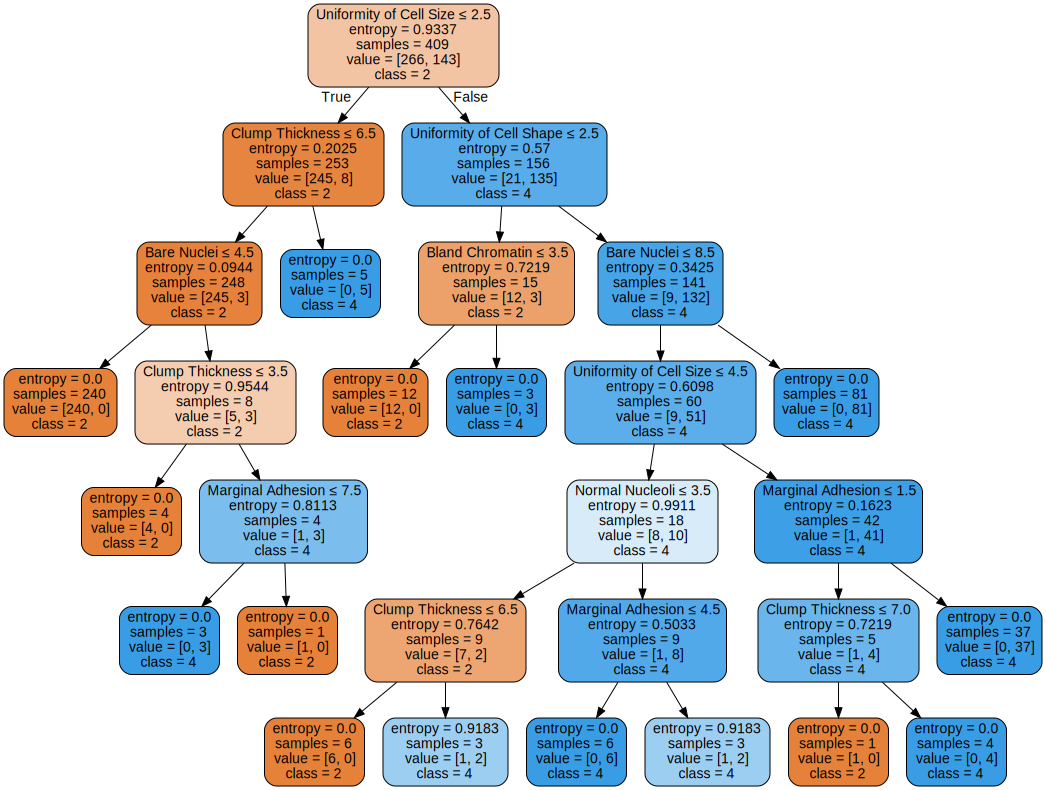

In [67]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 


# Information gain
clf_infoG = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf_infoG = clf_infoG.fit(X_train, y_train)
feature_names = list(X.columns)
infoG_tree = tree.export_graphviz(clf_infoG, out_file= None, 
                                feature_names=feature_names,
                                class_names='24',
                                filled=True, rounded=True,  
                                special_characters=True)

infoG_graph = graphviz.Source(infoG_tree)
infoG_graph

In [68]:
#model evaluation
y_pred_infoG = clf_infoG.predict(X_test)               
infoG_matrix = confusion_matrix(y_test, y_pred_infoG)
print (infoG_matrix) 

print(classification_report(y_test, y_pred_infoG, target_names=["benign", "malignant"]))


[[167  11]
 [  5  91]]
             precision    recall  f1-score   support

     benign       0.97      0.94      0.95       178
  malignant       0.89      0.95      0.92        96

avg / total       0.94      0.94      0.94       274



# ROC

In [88]:
Rcancer = pd.read_csv('C:\\Users\Zhihan Gao\Desktop\Data1.csv', sep=",", header=None)
datadrop =Rcancer.dropna(axis=0)
datadrop.isnull().sum()

xname=[datadrop.columns.values[1:10]]
yname=[datadrop.columns.values[10]]
X=datadrop.iloc[:,1:10]
y=datadrop.iloc[:,10]
y=y.replace([2,4],[0,1])
target=y.replace([0,1],['0','1']).unique()

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score


loR = LogisticRegression(penalty='l2', C=0.01,random_state=1)
clf_infoG = DecisionTreeClassifier(criterion="entropy", max_depth=6)
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')

In [90]:
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']
all_clf = [loR, infoG_tree, knn]
colors = [ 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

In [87]:
for clf, label, clr, ls in zip (all_clf, clf_labels, colors, linestyles):
    
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')


#-------
#plt.plot([0, 1], [0, 1],
#         linestyle='--',
#         color='gray',
#         linewidth=2)

#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
#plt.grid(alpha=0.5)
#-------
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

C:\Users\Zhihan Gao\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Data is not binary and pos_label is not specified

# Learning Curve

In [70]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import neighbors
import matplotlib.pyplot as plt


title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\Zhihan Gao\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

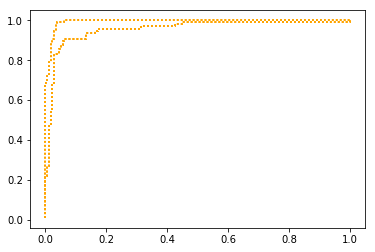

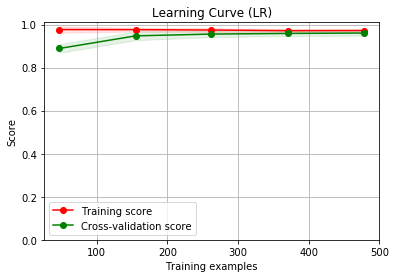

In [71]:
plt.show()